## Import Data & Python Packages

In [1]:
#Import necessary packages:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#Loading .csv file to Pandas dataframe
adfood_eff= pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

In [3]:
#Exploring the information of the data
adfood_eff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
RA_Report #                        90786 non-null int64
RA_CAERS Created Date              90786 non-null object
AEC_Event Start Date               53653 non-null object
PRI_Product Role                   90786 non-null object
PRI_Reported Brand/Product Name    90786 non-null object
PRI_FDA Industry Code              90786 non-null int64
PRI_FDA Industry Name              90786 non-null object
CI_Age at Adverse Event            52926 non-null float64
CI_Age Unit                        90786 non-null object
CI_Gender                          90786 non-null object
AEC_One Row Outcomes               90786 non-null object
SYM_One Row Coded Symptoms         90781 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 8.3+ MB


In [4]:
#Removing unwanted columns which are not useful for my prediction
adfood_eff= adfood_eff.drop(['RA_Report #', 'RA_CAERS Created Date', 'AEC_Event Start Date', 'PRI_Product Role', 'PRI_FDA Industry Code'], axis=1)

In [5]:
#Renaming the columns
adfood_eff.columns= ['Product Brand/Name', 'Industry Name', 'Age', 'Age Unit', 'Gender', 'Outcomes', 'Symptoms']

In [6]:
adfood_eff.head()

,Product Brand/Name,Industry Name,Age,Age Unit,Gender,Outcomes,Symptoms
0,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


## Missing Values and Outcomes Assessment

In [7]:
#Extracting the serious and non-serious outcomes
adfood_eff['outcome']=((adfood_eff['Outcomes'].str.contains("(?:\s|^)HOSPITALIZATION(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)OTHER SERIOUS \(IMPORTANT MEDICAL EVENTS\)(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)LIFE THREATENING(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)SERIOUS INJURIES\/ ILLNESS(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)DISABILITY(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)DEATH(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)CONGENITAL ANOMALY(?:\s|$)")))

In [8]:
#Converting the outcomes into binary values
adfood_eff['Outcomes_group']= [1 if o==True else 0 for o in adfood_eff['outcome']]

In [9]:
adfood_eff.head()

,Product Brand/Name,Industry Name,Age,Age Unit,Gender,Outcomes,Symptoms,outcome,Outcomes_group
0,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",True,1
1,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",True,1
2,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA",False,0
3,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",False,0
4,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",False,0


In [10]:
#Dropping the unnecessary columns
adfood_eff= adfood_eff.drop(['Outcomes', 'outcome'], axis=1)

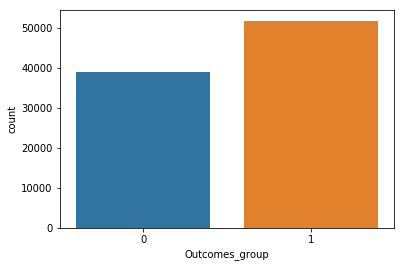

In [11]:
#Viaualization of number of outcomes 
import seaborn as sns
sns.countplot(x='Outcomes_group', data=adfood_eff)
plt.show()

In [12]:
#Percentage of serious and non-serious
count_serious= len(adfood_eff[adfood_eff['Outcomes_group']==1])
count_non_serious= len(adfood_eff[adfood_eff['Outcomes_group']==0])
percent_serious= count_serious/len(adfood_eff)
print("percentage of serious reports is", percent_serious*100)
percent_non_serious= count_non_serious/len(adfood_eff)
print("percentage of non_serious reports is", percent_non_serious*100)

percentage of serious reports is 57.0737778952702
percentage of non_serious reports is 42.9262221047298


In [13]:
#EDA on outcomes
adfood_eff.groupby('Outcomes_group').mean()

,Age
Outcomes_group,
0,41.198422
1,55.420903


In [14]:
#Drop NaN(missing age) values
adfood_eff=adfood_eff.dropna(subset=['Age'])

In [14]:
#Age units
adfood_eff['Age Unit'].unique()

array(['Year(s)', 'Not Available', 'Month(s)', 'Week(s)', 'Day(s)',
       'Decade(s)'], dtype=object)

In [15]:
#Converting all age into years
adfood_eff.loc[adfood_eff['Age Unit']=='Month(s)', 'Age']=  adfood_eff['Age']/10
adfood_eff.loc[adfood_eff['Age Unit']=='Week(s)', 'Age']=  adfood_eff['Age']/52.1429
adfood_eff.loc[adfood_eff['Age Unit']=='Day(s)', 'Age']=  adfood_eff['Age']/365
adfood_eff.loc[adfood_eff['Age Unit']=='Decade(s)', 'Age']=  adfood_eff['Age']*10 
adfood_eff['Age Unit']= 'Year(s)'

In [16]:
#Dropping the ages greater than 110 years
adfood_eff= adfood_eff.drop(adfood_eff[adfood_eff['Age']>110].index)

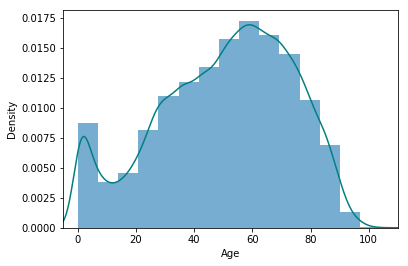

In [17]:
#Distribution of age
ax = adfood_eff["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
adfood_eff["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-5,110)
plt.show()

In [18]:
# mean and median of age
print('The mean of "Age" is %.2f' %(adfood_eff["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(adfood_eff["Age"].median(skipna=True)))

The mean of "Age" is 50.37
The median of "Age" is 53.00


In [19]:
#Imputing the age values
adfood_eff["Age"].fillna(adfood_eff["Age"].median(skipna=True), inplace=True)

## Exploratory Data Analysis

Text(0,0.5,'Frequency of Serious and Non-Serious')

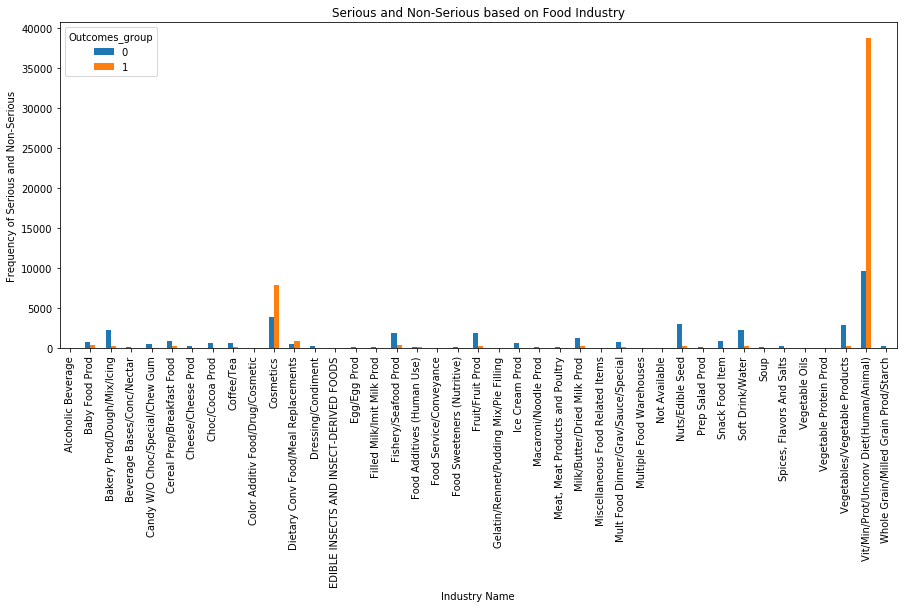

In [20]:
#Visualization of serious and non-serious based on industry
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,6)
pd.crosstab(adfood_eff['Industry Name'],adfood_eff['Outcomes_group']).plot(kind='bar')
plt.title('Serious and Non-Serious based on Food Industry')
plt.xlabel('Industry Name')
plt.ylabel('Frequency of Serious and Non-Serious')

(-20, 115)

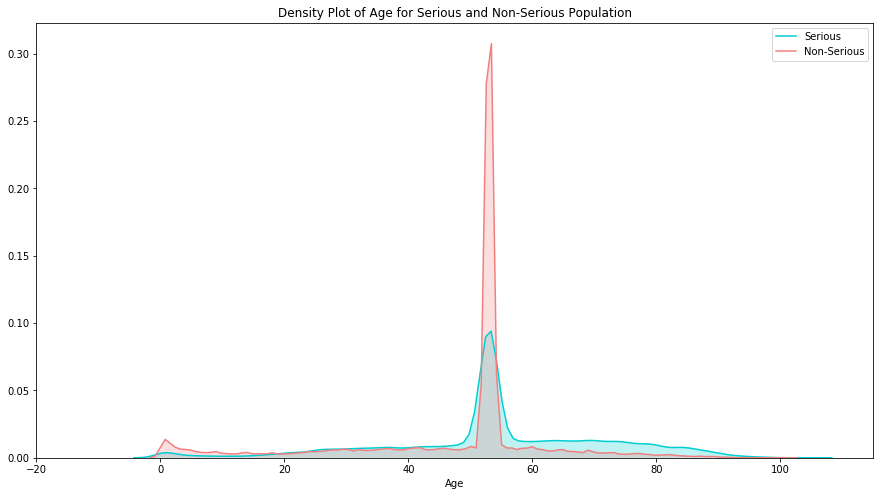

In [21]:
#Visualization of serious and non-serious based on industry
plt.figure(figsize=(15,8))
ax = sns.kdeplot(adfood_eff["Age"][adfood_eff.Outcomes_group == 1], color="darkturquoise", shade=True)
sns.kdeplot(adfood_eff["Age"][adfood_eff.Outcomes_group == 0], color="lightcoral", shade=True)
plt.legend(['Serious', 'Non-Serious'])
plt.title('Density Plot of Age for Serious and Non-Serious Population')
ax.set(xlabel='Age')
plt.xlim(-20,115)

## Logistic Regression Model and Analysis

In [22]:
#Creating dummy variables
cat_vars=['Product Brand/Name','Industry Name','Gender','Age Unit','Symptoms']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(adfood_eff[var], prefix=var)
    adfood_eff1=adfood_eff.join(cat_list)
    adfood_eff=adfood_eff1

In [23]:
cat_vars=['Product Brand/Name','Industry Name','Gender','Age Unit','Symptoms']
adfood_eff_vars=adfood_eff.columns.values.tolist()
to_keep=[i for i in adfood_eff_vars if i not in cat_vars]

In [24]:
#Final values and coulmns
adfood_eff_final=adfood_eff[to_keep]
adfood_eff_final.columns.values

array(['Age', 'Outcomes_group', 'Product Brand/Name_ AMBER JACK FILLETS',
       ...,
       'Symptoms_YELLOW SKIN, OCULAR ICTERUS, CHROMATURIA, FATIGUE, NAUSEA, BLOOD ALKALINE PHOSPHATASE INCREASED, ALANINE AMINOTRANSFERASE INCREASED, ASPARTATE AMINOTRANSFERASE INCREASED, BILIRUBIN CONJUGATED INCREASED, BLOOD BILIRUBIN INCREASED, LIPASE INCREASED, ABDOMINAL PAIN UPPER',
       'Symptoms_YELLOW SKIN, SKIN DISCOLOURATION',
       'Symptoms_YERSINIA INFECTION'], dtype=object)

In [25]:
#Assigning the values for feature and target variables
X = adfood_eff_final.loc[:, adfood_eff_final.columns != 'Outcomes_group']
y = adfood_eff_final.loc[:, adfood_eff_final.columns == 'Outcomes_group'].values.ravel()

In [26]:
#Building Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

MemoryError: 

In [28]:
#Calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


## Model evaluation based on K-fold cross-validation using cross_val_score() function

In [ ]:
#Logistic Regression with Cross Validation method
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

In [ ]:
#Logistic Regression and RFE Model
from sklearn.feature_selection import RFE

# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()
steps= [('imputation', imp), ('logistic regression', logreg)]
pipeline= Pipeline(steps)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)